In [35]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [36]:
batch_size = 2048

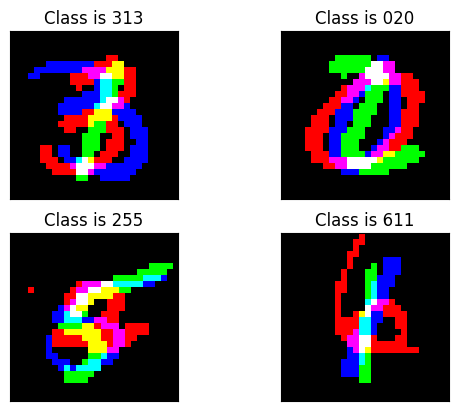

In [37]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_MISSING, default_batch_size=9)
img, labels = gen.get_random_batch(batch_size=4)
labels = labels // 10
gen.plot_example(images=img, labels=labels)

#img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
#print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

#RGB


In [65]:
def split_images_labels(images, labels):
    """ Split each image in the batch into its RGB components,
    each becoming a single-channel image with its
    corresponding label intact """
    red_channel = images[:, :, :, 0:1]
    green_channel = images[:, :, :, 1:2]
    blue_channel = images[:, :, :, 2:3]

    # concatenate along the batch axis
    new_images = np.concatenate((red_channel, green_channel, blue_channel), axis=0)
    
    print(labels)
    if labels.ndim == 1:
        labels = labels.reshape(-1, 1)
    labels = labels.astype(str)
    labels = np.char.zfill(labels, 3)

    labels = np.array([list(map(int, list(row[0]))) for row in labels])
    # Concatenate the first, second, and last rows
    new_labels = np.concatenate([labels[0], labels[1], labels[-1]])

    return new_images, new_labels

def merge_images_labels(single_channel_images, labels):
    """Merge each set of three single-channel images
    back into RGB images and concat labels
    back to the original form."""
    batch_size = single_channel_images.shape[0] // 3
    
    # Reshape the images back into RGB
    merged_images = np.stack((
        single_channel_images[:batch_size, :, :, 0], 
        single_channel_images[batch_size:2*batch_size, :, :, 0], 
        single_channel_images[2*batch_size:, :, :, 0]
    ), axis=-1)
    
    # Reduce the labels back to original form
    original_labels = labels[:batch_size]
    
    return merged_images, original_labels


[313  20 255 611]
(12, 28, 28, 1)
(28, 28, 1)
(9,)


IndexError: index 9 is out of bounds for axis 0 with size 9

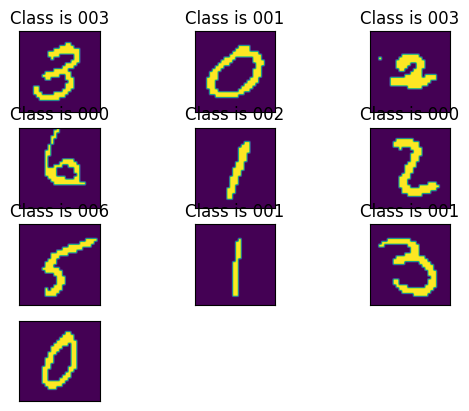

In [66]:
imgWhite, labelsWhite = split_images_labels(img, labels)
print(imgWhite.shape)
print(imgWhite[0].shape)
print(labelsWhite.shape)

gen.plot_example(images=imgWhite, labels=labelsWhite)

imgBack, labelsBack = merge_images_labels(imgWhite, labelsWhite)
print(imgBack.shape)
print(imgBack[0].shape)
print(labelsBack.shape)

gen.plot_example(images=imgBack, labels=labelsBack)